<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/3-DL/22-Keras-Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

Data Set Preparation

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [ ]:
df.tail()

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
X = df.drop('default.payment.next.month',axis =1).values
y = df['default.payment.next.month'].values

In [9]:
X[-1]

array([3.0000e+04, 5.0000e+04, 1.0000e+00, 2.0000e+00, 1.0000e+00,
       4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 4.7929e+04, 4.8905e+04, 4.9764e+04,
       3.6535e+04, 3.2428e+04, 1.5313e+04, 2.0780e+03, 1.8000e+03,
       1.4300e+03, 1.0000e+03, 1.0000e+03, 1.0000e+03])

In [10]:
y[-1]

1

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
len(X_test)

9000

In [13]:
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[-1]

array([ 0.99665793, -0.05504288,  0.80648893,  0.18648797, -1.05381817,
        0.05416417, -1.75953854, -1.55812877, -1.53465571, -1.52240712,
       -1.52891352, -1.47994938, -0.69525161, -0.69097285, -0.62375055,
       -0.62828283, -0.63857885, -0.41844068, -0.33415838, -0.09207261,
       -0.1142242 , -0.20131106,  0.58979774, -0.210825  ])

In [16]:
X_test[-1]

array([ 1.31667539,  0.64128415,  0.80648893, -1.07681763, -1.05381817,
        0.05416417, -1.75953854, -1.55812877, -1.53465571, -1.52240712,
       -1.52891352, -1.47994938, -0.660758  , -0.63456471, -0.58158922,
       -0.60475898, -0.59385685, -0.64348454, -0.09827316,  0.02341059,
       -0.04270981, -0.03617943, -0.25518015,  0.22190272])

In [17]:
len(X_train)

21000

In [18]:
input_param = X.shape[1]

In [19]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=512, input_shape=[input_param], activation='relu'),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.2),
    # layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    # layers.BatchNormalization(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
])

In [20]:
# model.add(layers.Dense(units = 1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12800     
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [22]:
#compile the model
model.compile(optimizer = 'adam' ,
             loss = 'binary_crossentropy',
             metrics =['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=100,shuffle = True, verbose =2)

Epoch 1/100
657/657 - 15s - loss: 0.4730 - accuracy: 0.8020 - 15s/epoch - 23ms/step
Epoch 2/100
657/657 - 13s - loss: 0.4478 - accuracy: 0.8133 - 13s/epoch - 20ms/step
Epoch 3/100
657/657 - 14s - loss: 0.4452 - accuracy: 0.8148 - 14s/epoch - 21ms/step
Epoch 4/100
657/657 - 14s - loss: 0.4399 - accuracy: 0.8170 - 14s/epoch - 21ms/step
Epoch 5/100
657/657 - 13s - loss: 0.4364 - accuracy: 0.8170 - 13s/epoch - 20ms/step
Epoch 6/100
657/657 - 14s - loss: 0.4350 - accuracy: 0.8184 - 14s/epoch - 21ms/step
Epoch 7/100
657/657 - 14s - loss: 0.4330 - accuracy: 0.8194 - 14s/epoch - 21ms/step
Epoch 8/100
657/657 - 14s - loss: 0.4319 - accuracy: 0.8170 - 14s/epoch - 21ms/step
Epoch 9/100
657/657 - 14s - loss: 0.4306 - accuracy: 0.8200 - 14s/epoch - 21ms/step
Epoch 10/100
657/657 - 14s - loss: 0.4281 - accuracy: 0.8200 - 14s/epoch - 22ms/step
Epoch 11/100
657/657 - 13s - loss: 0.4274 - accuracy: 0.8222 - 13s/epoch - 20ms/step
Epoch 12/100
657/657 - 14s - loss: 0.4288 - accuracy: 0.8213 - 14s/epoch -

In [24]:
#quantify the model
model_loss, model_accuracy = model.evaluate(X_test,y_test,verbose =2)
print( model_loss )
print (model_accuracy)

282/282 - 1s - loss: 0.9367 - accuracy: 0.7629 - 1s/epoch - 5ms/step
0.9367004036903381
0.7628889083862305


In [25]:
from sklearn.metrics import recall_score

In [26]:
y_prediction = model.predict(X_test)

282/282 [==============================] - 1s 5ms/step


In [27]:
y_prediction[:3]

array([[0.16161606],
       [0.00061117],
       [0.04591533]], dtype=float32)

In [28]:
predictions = np.rint(y_prediction)

In [29]:
print("Recall score:"+ str(recall_score(y_test, predictions)))

Recall score:0.3637755102040816


In [30]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6153  887]
 [1247  713]]


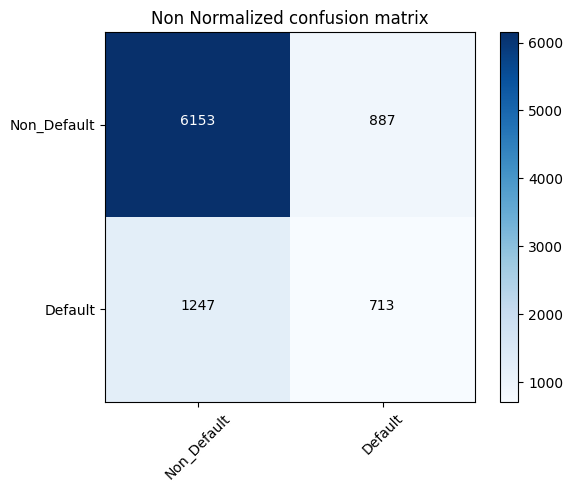

In [32]:
cnf_matrix = confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')